In [1]:
import sys
import os

# add the parent directory (iris) to sys.path so it can be found
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

In [2]:
from scanpy import read_h5ad
from iris.src.iris import IRIS

/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Global seed set to 0
/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [3]:
# path = '../../data/screen_data.h5ad' # replace with your path to data
path = '/lab/tambora_li/Nicholas/figures-paper/fig5v2/fig5v2_data.h5ad'

In [4]:
import numpy as np # delete later
adata = read_h5ad(path) 
adata = adata[np.isin(adata.obs['batch'], [1,2,3])] # delete later
iris_ex = IRIS('fig34_example', anndata = adata)

/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
adata.obs

,batch,celltype,RA_class,Wnt_class,TgfB_class,Bmp_class,Fgf_class,species,Shh_class,_scvi_batch,_scvi_labels
AAACCTGAGAACTGTA-1,1,Epiblast,Stim,Ctrl,Stim,Ctrl,Stim,mouse,Ctrl,0,0
AAACCTGAGTCAAGCG-1,1,Epiblast,Ctrl,Stim,Ctrl,Stim,Ctrl,mouse,Ctrl,0,1
AAACCTGAGTGCGTGA-1,1,Epiblast,Ctrl,Stim,Ctrl,Stim,Ctrl,mouse,Ctrl,0,1
AAACCTGGTTCAGGCC-1,1,Epiblast,Ctrl,Stim,Ctrl,Stim,Stim,mouse,Ctrl,0,1
AAACCTGTCATGTAGC-1,1,Epiblast,Stim,Ctrl,Ctrl,Stim,Ctrl,mouse,Ctrl,0,1
...,...,...,...,...,...,...,...,...,...,...,...
AATCGGTAGCCCAGCT-1,2,Primitive Streak,Stim,Ctrl,Ctrl,Stim,Ctrl,mouse,Stim,1,1
AATCGGTAGTGCAAGC-1,2,Primitive Streak,Ctrl,Stim,Ctrl,Ctrl,Ctrl,mouse,Stim,1,0
AATCGGTCAACTGCTA-1,2,Primitive Streak,Ctrl,Stim,Stim,Stim,Stim,mouse,Ctrl,1,1
AATCGGTGTTACCGAT-1,2,Primitive Streak,Stim,Stim,Ctrl,Ctrl,Ctrl,mouse,Ctrl,1,0


# Make signaling state predictions with IRIS
IRIS will save the trained SCVI and SCANVI models to the same directory that the notebook is in, along with a .csv of the predictions.

In [6]:
# run_model saves the trained SCVI and SCANVI models to your directory
predictions, adata_results = iris_ex.run_model('predictions.csv')

/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:415: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.anndata.obs['Clusters'] = "unknown"
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 306/400:  76%|███████▋  | 306/400 [06:42<02:03,  1.32s/it, loss=8.12e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 8426.104. Signaling Trainer to stop.
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.64s/it, loss=8.27e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.65s/it, loss=8.27e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:466: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_results.obs[val+'_predictions'] = predictions
/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.53s/it, loss=8.25e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.51s/it, loss=8.25e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.62s/it, loss=8.28e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.63s/it, loss=8.28e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.60s/it, loss=8.28e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.59s/it, loss=8.28e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.59s/it, loss=8.27e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:12<00:00,  2.59s/it, loss=8.27e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.62s/it, loss=8.28e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:13<00:00,  2.62s/it, loss=8.28e+03, v_num=1]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# Evaluate IRIS's predictions
Score IRIS predictions against the data through AUROC/AUPRC/F1. The function can also save any generated AUROC/AUPRC/F1 plots.

/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:207: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.anndata.obs[name] = adata_gifford.obs[name]


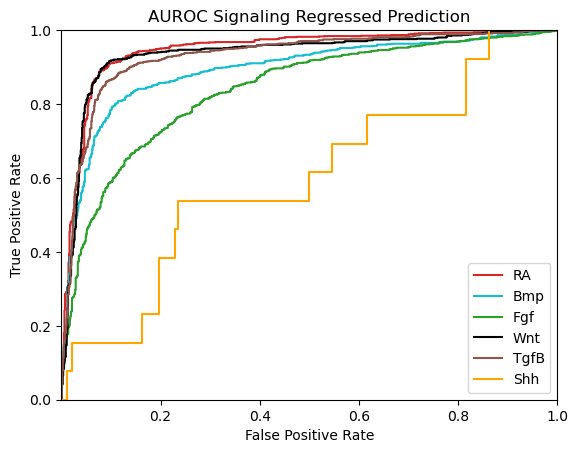

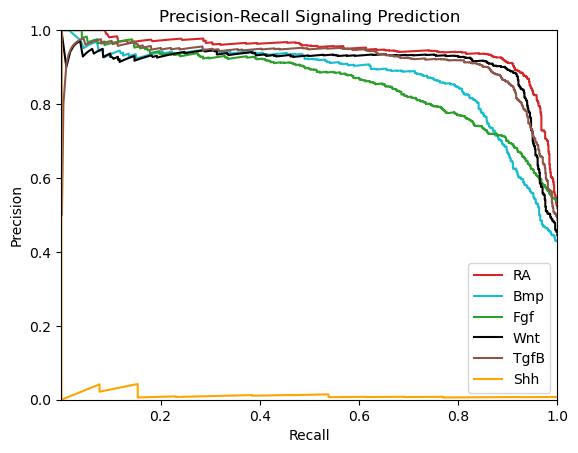

In [6]:
from pandas import read_csv
predictions = read_csv('predictions.csv')
scores = iris_ex.evaluate(predictions, metrics=['AUROC', 'AUPRC'])

In [7]:
scores

{'RA': {'AUROC': 0.9467423040736508, 'AUPRC': 0.9441388475923047},
 'Bmp': {'AUROC': 0.8929834107932431, 'AUPRC': 0.8704099258713481},
 'Fgf': {'AUROC': 0.8387497424671017, 'AUPRC': 0.8593697918315288},
 'Wnt': {'AUROC': 0.9352262644188111, 'AUPRC': 0.9082758534113784},
 'TgfB': {'AUROC': 0.9300586434773824, 'AUPRC': 0.9162439647072214},
 'Shh': {'AUROC': 0.5991762327905115, 'AUPRC': 0.011448931905211915}}

You may notice that the IRIS performance on Shh does not seem very good! In this dataset, there are only about 20 labeled samples with Shh out of ~10,000 cells, so it is expected that the model will not be able to predict Shh well from this data.

# Hold out given signaling conditions and see how it affects F1 scores. 

/lab/tambora_li/Claire/miniconda3/envs/scvi-gpu/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:643: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cat_out.obs[class_names] = 'unknown'
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 25/25: 100%|██████████| 25/25 [00:33<00:00,  1.30s/it, loss=8.61e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it, loss=8.61e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.53e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.53e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.70s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.54e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.54e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.54e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.54e+03, v_num=1]


/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:643: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cat_out.obs[class_names] = 'unknown'
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 25/25: 100%|██████████| 25/25 [00:32<00:00,  1.29s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████████| 25/25 [00:32<00:00,  1.31s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.56e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.56e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.56e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it, loss=8.56e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.56e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.56e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.56e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it, loss=8.56e+03, v_num=1]


/lab/tambora_li/Claire/thesis/IRIS_signaling_inference/iris/src/iris.py:643: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cat_out.obs[class_names] = 'unknown'
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 25/25: 100%|██████████| 25/25 [00:32<00:00,  1.26s/it, loss=8.53e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 25/25: 100%|██████████| 25/25 [00:32<00:00,  1.30s/it, loss=8.53e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it, loss=8.54e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it, loss=8.55e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it, loss=8.55e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.78s/it, loss=8.53e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.77s/it, loss=8.53e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.75s/it, loss=8.54e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:08<00:00,  1.76s/it, loss=8.54e+03, v_num=1]
INFO     Training for 5 epochs.                                                                                    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 5/5: 100%|██████████| 5/5 [00:09<00:00,  1.83s/it, loss=8.53e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:09<00:00,  1.82s/it, loss=8.53e+03, v_num=1]


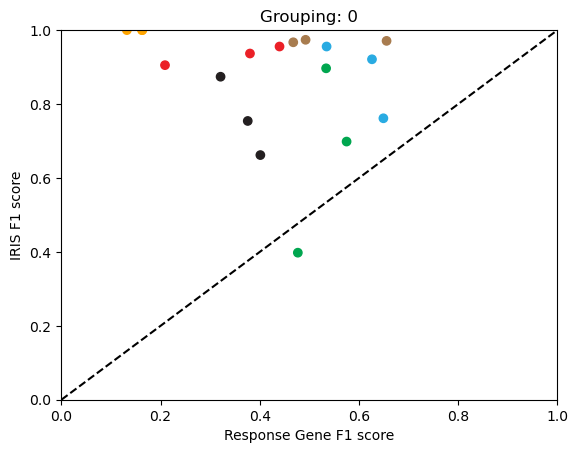

In [12]:
response_scores, iris_scores = iris_ex.held_out_condition_validation(conditions=['RA+Bmp-Fgf+Wnt-TgfB+Shh-', 'RA-Bmp+Fgf+Wnt+TgfB+Shh-', 'RA+Bmp+Fgf+Wnt-TgfB-Shh-'])

In [13]:
print('Response gene method F1 scores:', response_scores)
print('IRIS F1 scores:', iris_scores)

Response gene method F1 scores: [0.9556451612903225, 0.9556451612903225, 0.6984924623115578, 0.967098703888335, 0.8739130434782608, 1.0, 0.9052224371373307, 0.7614879649890591, 0.8966861598440545, 0.9709090909090909, 0.6619385342789599, 1.0, 0.9367088607594937, 0.9211009174311926, 0.3978201634877384, 0.9738219895287958, 0.7542372881355932, 1.0]
IRIS F1 scores: [0.4397590361445783, 0.5346534653465346, 0.5749656121045392, 0.46745562130177515, 0.3209076175040519, 0.1631205673758865, 0.2088607594936709, 0.649164677804296, 0.533678756476684, 0.655581947743468, 0.4011299435028249, 0.132013201320132, 0.3801652892561984, 0.6261682242990654, 0.4766839378238343, 0.4923076923076923, 0.3756906077348066, 0.16249999999999998]
